# price optimization

In [1]:
import pandas as pd
import plotly.express as ex
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt

# Load data

In [2]:
data = pd.read_csv('C:\\Users\\Maxwell\\Desktop\\retail_price.csv')
data.head(6)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95
5,bed1,bed_bath_table,01-10-2017,3,137.85,15.100000,45.95,39,161,2,...,89.9,3.9,21.572143,45.950000,4.0,15.100000,45.95,4.0,15.100000,45.95


# Clean Data

In [3]:
### NULL VALUES
data.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [4]:

data = data.drop_duplicates()

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [6]:
data1 = data.copy()

In [7]:
# OUTLIERS

outlier_list = ["qty", "customers","comp_1","comp_3"]


for i in data1.loc[:, outlier_list]:
    Q1 = data1[i].quantile(0.1)
    Q3 = data1[i].quantile(0.9)
    IQR = Q3 - Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR
    
    if data1[(data1[i]>up) | data1[i]< low].any(axis = None):
        print(i, "yes")
    else:
        print(i, "no")
   

qty no
customers no
comp_1 no
comp_3 no


# EDA

NameError: name 'sns' is not defined

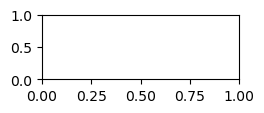

In [8]:

k= 1
plt.figure(figsize = (27,27))

for i in data.select_dtypes(["int","float"]):
    plt.subplot(27, 9, k)
    sns.distplot(data[i])
    plt.title(i)
    k+=1
    plt.tight_layout()

In [ ]:
## DISTRIBUTION OF PRICE BY HISTOGRAM
fig1 = ex.histogram(data, x = 'total_price', nbins = 18, 
            title = 'distribution of Price')
fig1.show()

In [ ]:
fig2 = ex.box(data,
              y = 'unit_price',
              title = 'Boxplot of unit_price'
).show()

In [ ]:
ex.scatter(data,
          x = 'unit_price',
          y = 'qty',
          title = 'Quantity vs Price',
          trendline = "ols")

In [ ]:
ex.scatter(data,
          x = 'total_price',
          y = 'qty',
          title = 'Quantity vs Price',
          trendline = "ols")

In [ ]:
ex.bar(data,
      x = "product_category_name",
      y = 'total_price')

In [ ]:
sns.pairplot(data);

In [ ]:
data.hist(figsize = (9,9));

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")


# encoding

In [ ]:
dummy_bbt = pd.get_dummies(data["product_category_name"],dtype = int)
dummy_bbt

In [9]:
data1 = data.drop("product_category_name",axis = 1)
data1.head()

,product_id,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,01-05-2017,1,45.95,15.100000,45.95,39,161,2,350,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,01-06-2017,3,137.85,12.933333,45.95,39,161,2,350,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,01-07-2017,6,275.70,14.840000,45.95,39,161,2,350,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,01-08-2017,4,183.80,14.287500,45.95,39,161,2,350,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,01-09-2017,2,91.90,15.100000,45.95,39,161,2,350,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [10]:
data.head(3)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.0,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.0,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.0,4.4,22.195932,45.95,4.0,14.840000,45.95


In [11]:
data2 = pd.concat([data,dummy_bbt], axis = 1)

NameError: name 'dummy_bbt' is not defined

In [12]:
data2 = data2.drop(["month_year"], axis = 1)
data2.head()

NameError: name 'data2' is not defined

# correlation analysis

In [13]:
plt.figure(figsize = (15,15))
sns.heatmap(data2.corr(), annot = True, linewidths = 1, fmt = ".2f", cmap = "coolwarm")
plt.show()

NameError: name 'sns' is not defined

<Figure size 1500x1500 with 0 Axes>

In [14]:
cor=data2.corr()["lag_price"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with lag_price":cor.values})

NameError: name 'data2' is not defined

# modelling


In [15]:
X = data2.drop("lag_price", axis = 1)
y = data2["lag_price"]

NameError: name 'data2' is not defined

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

NameError: name 'train_test_split' is not defined

In [17]:
!pip install catboost

In [18]:
!pip install lightgbm

In [19]:
!pip install xgboost

In [20]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [21]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)

NameError: name 'Ridge' is not defined

In [ ]:
models = [ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

def ML(y, models):
    accuracy = models.score(X_train, y_test)
    return accuracy

In [ ]:
for i in models:
    print(i, "algorithm success = " , ML("survived",i))